# Description

It gets the PCA transformation of an input file.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd
import seaborn as sns

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

## Input data

In [4]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [5]:
INPUT_FILEPATH = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [6]:
# output dir for this notebook
RESULTS_DIR = Path(conf.RESULTS["DATA_TRANSFORMATIONS_DIR"], "pca").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca')

## PCA options

In [7]:
# parameters of the dimentionality reduction steps
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [8]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': 50, 'svd_solver': 'full', 'random_state': 0}

# Load input file

In [9]:
data = pd.read_pickle(INPUT_FILEPATH)

In [10]:
display(data.shape)

(3752, 987)

In [11]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# PCA

In [12]:
from data.dimreduction import get_pca_proj

In [13]:
dr_data = get_pca_proj(data, DR_OPTIONS)

"PCA object: PCA(n_components=50, random_state=0, svd_solver='full')"

In [14]:
display(dr_data.shape)

(3752, 50)

In [15]:
display(dr_data.head())

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,0.805216,-0.865390,0.699480,-0.065976,0.999617,-0.418645,1.993288,-0.346875,-1.522978,-2.382791,...,0.777932,0.507896,0.693668,1.024260,0.189606,-1.661826,0.281234,-0.096792,-0.339508,0.041431
100002_raw-Energy,0.588507,-1.491772,1.756340,-3.593295,2.100607,0.364910,1.254815,2.028484,-0.357607,-4.832726,...,-0.780215,-2.285033,-0.607663,-2.727018,1.711667,-0.535025,2.342068,0.197519,1.636996,-1.114410
100003_raw-Protein,1.910160,-1.873687,1.876677,-3.832557,1.240704,2.941375,2.293978,0.802473,0.665380,-4.375319,...,-0.547161,0.514721,0.034145,-0.423218,-0.324825,-0.000958,0.294579,1.186937,0.226722,0.169931
100004_raw-Fat,0.750799,-0.294733,1.317710,-1.346081,2.006403,0.533509,-0.752916,0.937515,-0.572191,-2.451612,...,0.060359,-0.878309,-0.774943,-1.914890,2.559763,1.547267,1.851110,-0.310431,3.495624,-1.595785
100005_raw-Carbohydrate,-0.530044,-0.007398,0.611418,-3.604094,2.227872,0.051271,0.001135,2.303819,-0.387759,-5.686184,...,-1.110273,-3.032541,-1.223873,-0.945626,2.150276,-1.798716,2.526678,0.716987,0.300972,-0.893854


## Plot

[2021-03-08 14:23:45,646 - numexpr.utils] INFO: NumExpr defaulting to 4 threads.


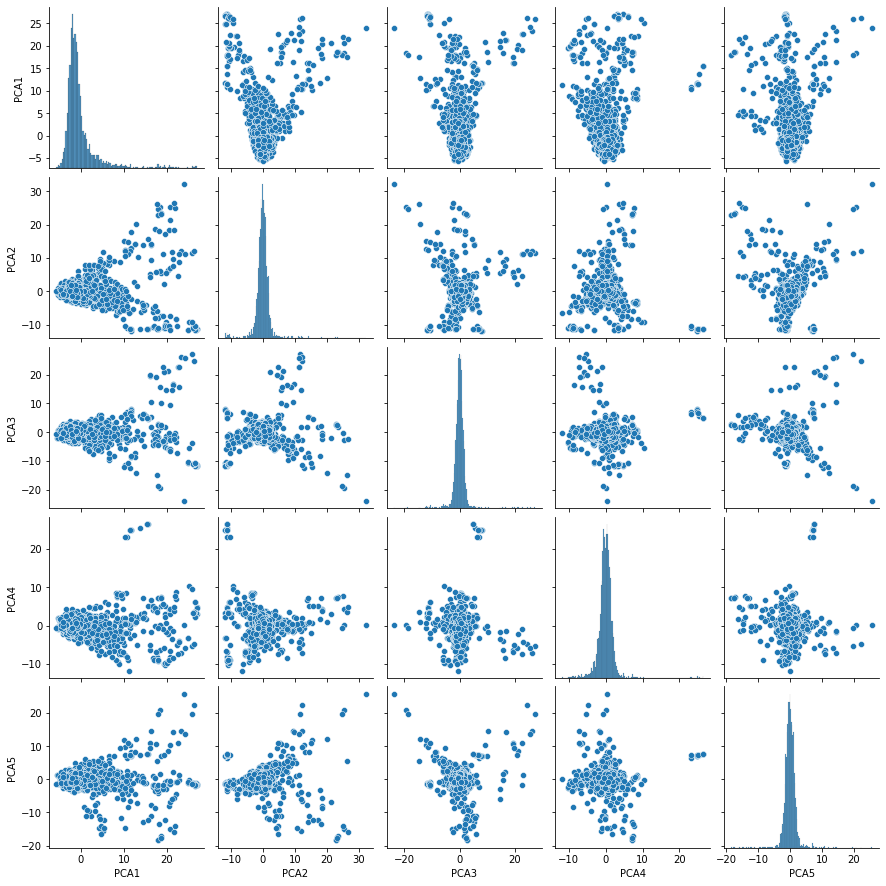

In [16]:
g = sns.pairplot(data=dr_data.iloc[:, :5])

# Save

In [17]:
output_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        ALL_OPTIONS, prefix=f"pca-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

display(output_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

In [18]:
dr_data.to_pickle(output_file)